In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.0 MB/s 


# 로지스틱 회귀분석
종속변수가 0이나 1을 가지는 이항분포를 이며 모수μ 가 독립변수에 의존한다고 가정   
종속변수 y는 0,1 값
$$\hat{y} = μ(x)$$
$$y =0 \quad if \quad \mu(x) <0.5$$
$$y =1 \quad if \quad \mu(x) >=0.5$$

## 시그모이드(Sigmoid)
- (a,b)사이의 값을 가지는 함수 a < f(x) < b
- 항상 양의 기울기를 가지는 함수 if a > b -> f(a) > f(b)
- 종류
  - 로지스틱 함수
$$logistic(z) = σ(x) = \frac{1}{1+exp(-z)}$$
  - 하이퍼볼릭탄젠트
  - 오차함수

NameError: ignored

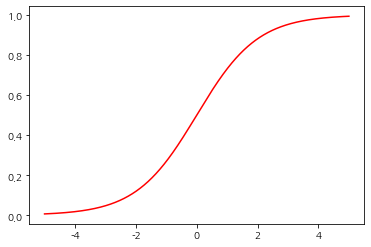

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special

xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label='로지스틱함수')
plt.plot(xx, scipy.special.erf(0.5*np.sqrt(np.pi)**xx), 'g:', label='오차함수')
plt.plot(xx, np.tanh(xx), 'b--', label='하이퍼볼릭탄젠트함수')
plt.ylim([-1.2,1.1])
plt.legend()
plt.xlabel('x')
plt.grid()
plt.show()

### 로지스틱함수
베르누이 분포의 1이 나올 확률 μ와 (1-μ)의 비율
$$odds ratio = \frac{μ}{1-μ}$$

로지스틱 회귀분석은 w가 모수

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


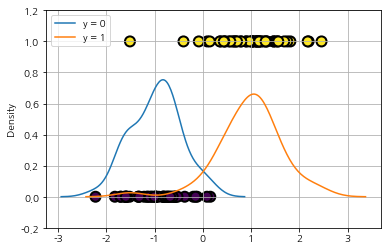

In [ ]:
from sklearn.datasets import make_classification
import seaborn as sns

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
plt.scatter(X0, y, c=y, s=100, edgecolors='k', linewidth=2)
sns.distplot(X0[y==0,:], label='y = 0', hist=False)
sns.distplot(X0[y==1,:], label='y = 1', hist=False)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.grid()
plt.show()

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.7679
Time:                        01:04:58   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


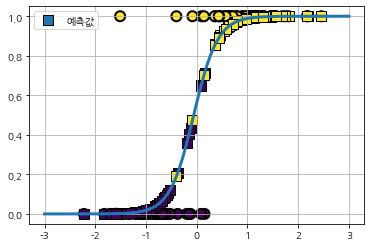

In [ ]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.scatter(X0, y, c=y, s=100, edgecolors='k', linewidth=2)
plt.scatter(X0, logit_res.predict(X), label='예측값', marker='s', c=y, s=100, edgecolor='k', lw=1)
plt.plot(xx, mu, lw=3)
plt.legend()
plt.grid()

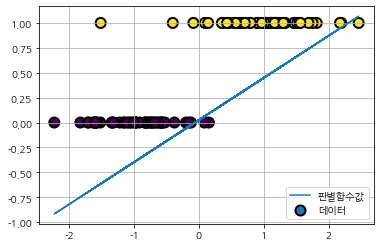

In [ ]:
plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=2, label='데이터')
plt.plot(X0, logit_res.fittedvalues*0.1, label='판별함수값')
plt.legend()
plt.grid()
plt.show()

예제
미국 의대생 입학관련 데이터.
- Acceptance : 0이면 불합격, 1이면 합격
- BCPM: Bio/Chem/Physics/Math 과목의 평균
- GPG : 전체과목의 학점 평균
- VR : MCAT Verbal reasoning 과목 점수
- PS : MCAT Physical sciences 과목 점수
- WS : MCAT Writing sample 과목 점수
- BS : MCAT Biological sciences 과목 점수
- MCAT :MCAT 총점
- Apps : 의대 지원 횟수

In [ ]:
data_med = sm.datasets.get_rdataset('MedGPA', package='Stat2Data')
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


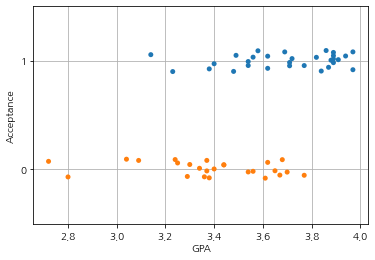

In [ ]:
sns.stripplot(x='GPA', y='Acceptance', data=df_med, jitter=True, orient='h', order=[1,0])
# plt.scatter(df_med.GPA, df_med.Acceptance)
plt.grid(True)
plt.show()

In [ ]:
model_med = sm.Logit.from_formula('Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps', df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.5913
Time:                        01:17:27   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

In [ ]:
prediction = result_med.predict(df_med)

In [ ]:
df_med['prediction'] = prediction

In [ ]:
df_med

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps,prediction
0,D,0,F,3.59,3.62,11,9,9.0,9,38,5,0.119286
1,A,1,M,3.75,3.84,12,13,8.0,12,45,3,0.999823
2,A,1,F,3.24,3.23,9,10,5.0,9,33,19,0.540585
3,A,1,F,3.74,3.69,12,11,7.0,10,40,5,0.978812
4,A,1,F,3.53,3.38,9,11,4.0,11,35,11,0.996344
5,A,1,M,3.59,3.72,10,9,7.0,10,36,5,0.587391
6,A,1,M,3.85,3.89,11,12,6.0,11,40,5,0.999205
7,D,0,M,3.26,3.34,11,11,8.0,9,39,7,0.075526
8,A,1,F,3.74,3.71,8,10,6.0,11,35,5,0.995005
9,A,1,F,3.86,3.89,9,9,6.0,10,34,11,0.983484
